In [1194]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

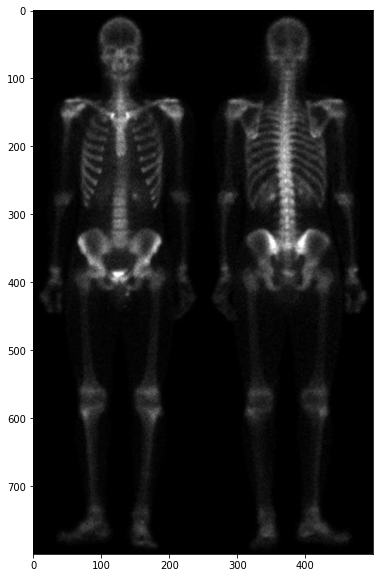

In [1195]:
B = cv2.imread("skeleton.jpg")
plt.figure(figsize=(10,10))
skelet = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
plt.imshow(B)

In [1196]:
def ConvertTo(img,K):
    min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(img)
    img=img - min_v
    img=K* img / max_v
    #min_v1, max_v1, min_pt1, max_pt1 = cv2.minMaxLoc(img)
    #img = img - min_v1 / (max_v1 - min_v1)
    #img=cv2.convertScaleAbs(img)
    return img


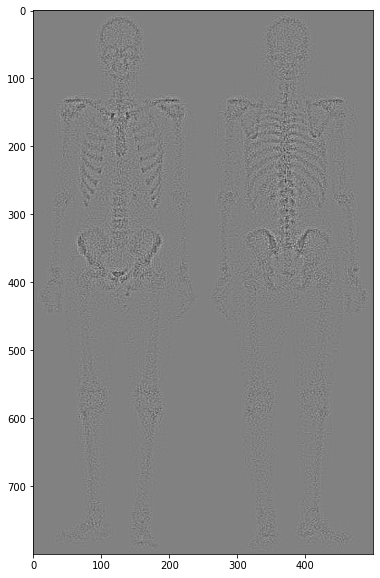

In [1197]:
#laplac=cv2.Laplacian(skelet, cv2.CV_16S, 2)
#plt.imshow(laplac)
kernel = np.array([[1, 1, 1], 
                   [1,-8, 1], 
                   [1, 1, 1]])
laplac = cv2.filter2D(skelet,cv2.CV_16S, kernel)
laplac = ConvertTo(laplac,126)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(laplac)
#laplac1 = cv2.convertScaleAbs(laplac)
plt.figure(figsize=(10,10))
plt.imshow(laplac,cmap = 'gray')

In [1198]:
min_v, max_v

(0.0, 254.8251121076233)

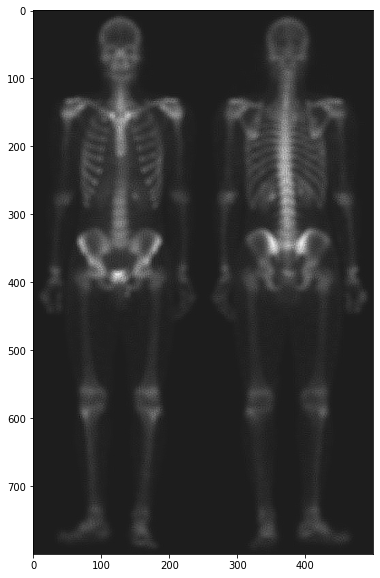

In [1199]:
laplacian=skelet + laplac
#laplacian=cv2.add(skelet, laplac)
laplacian = ConvertTo(laplacian,255)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(laplacian)

plt.figure(figsize=(10,10))
plt.imshow(laplacian,cmap = 'gray')

In [1200]:
min_v, max_v

(0.0, 198.00156705697992)

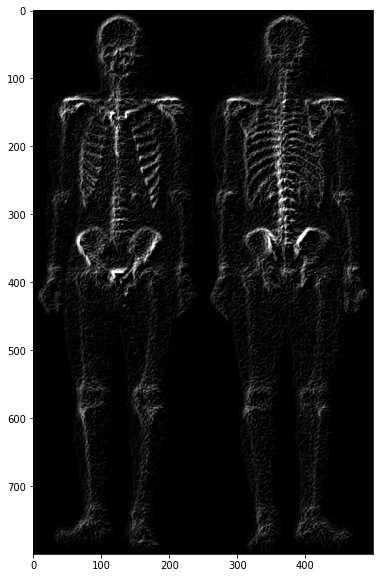

In [1201]:

kernelX = np.array([[-1, -2, -1], 
                   [0,0, 0], 
                   [1, 2, 1]])
kernelY = np.array([[-1, 0, 1], 
                   [-2,0, 2], 
                   [-1, 0, 1]])
#sobelX =cv2.filter2D(skelet,-1,kernelX)
#sobelY=cv2.filter2D(skelet,-1,kernelY)

sobelX =cv2.Sobel(skelet, -1, 1, 0)
sobelY=cv2.Sobel(skelet, -1, 0, 1)

sobel = cv2.add(sobelX, sobelY)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(sobel)
#sobel = ConvertTo(sobel,255)
plt.figure(figsize=(10,10))
plt.imshow(sobel,cmap = 'gray')

In [1202]:
min_v, max_v

(0.0, 255.0)

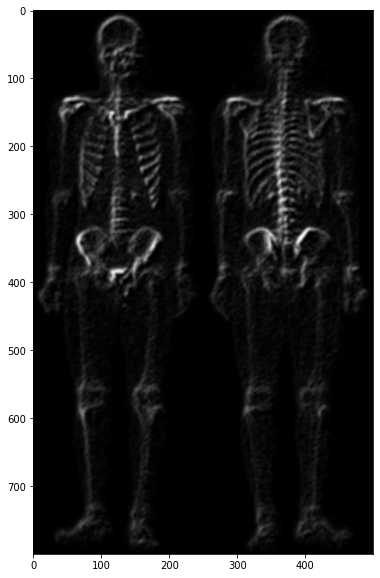

In [1203]:
#усредняющий фильтр
Blur = cv2.blur(sobel, ksize=(5, 5))
#Blur = cv2.medianBlur(sobel, ksize = 5)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(Blur)
#Blur = ConvertTo(Blur,255)
plt.figure(figsize=(10,10))
plt.imshow(Blur,cmap = 'gray')

In [1204]:
min_v,max_v

(0.0, 251.0)

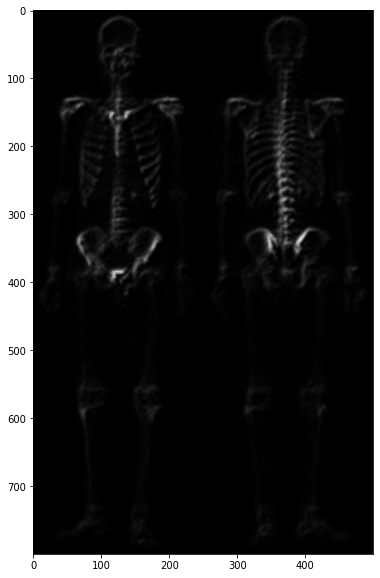

In [1205]:
#перемножение лапласиана и усредняющего фильтра
mask = Blur * laplacian  
#mask = cv2.multiply(Blur,laplacian, dtype=cv2.CV_16S)
#mask = cv2.bitwise_and(Blur,laplacian)

mask = ConvertTo(mask,255)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(mask)
plt.figure(figsize=(10,10))
plt.imshow(mask,cmap = 'gray')

In [1206]:
min_v, max_v

(0.0, 255.0)

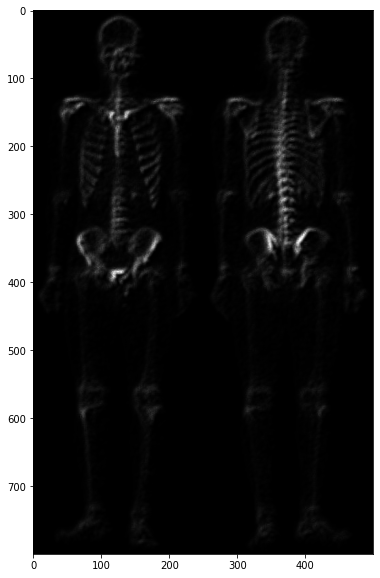

In [1207]:
mask = cv2.multiply(Blur,laplacian, dtype=cv2.CV_16S)
#mask = cv2.bitwise_and(Blur,laplacian)

mask = ConvertTo(mask,255)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(mask)
plt.figure(figsize=(10,10))
plt.imshow(mask,cmap = 'gray')

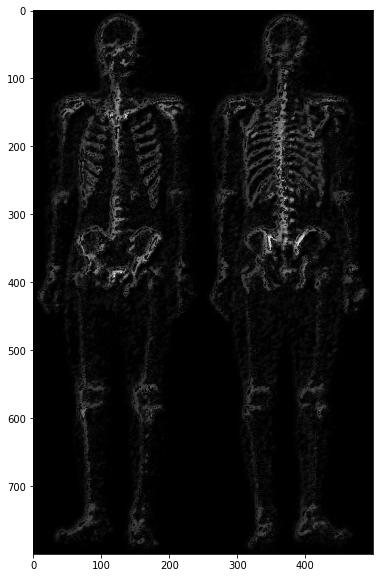

In [1208]:
laplacian1 = cv2.convertScaleAbs(laplacian) 
Blur1 = cv2.convertScaleAbs(Blur) 
mask1 = cv2.bitwise_and(laplacian1,Blur1)

#mask1 = ConvertTo(mask1,255)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(mask)
plt.figure(figsize=(10,10))
plt.imshow(mask1,cmap = 'gray')

In [1209]:
min_v, max_v

(0.0, 255.0)

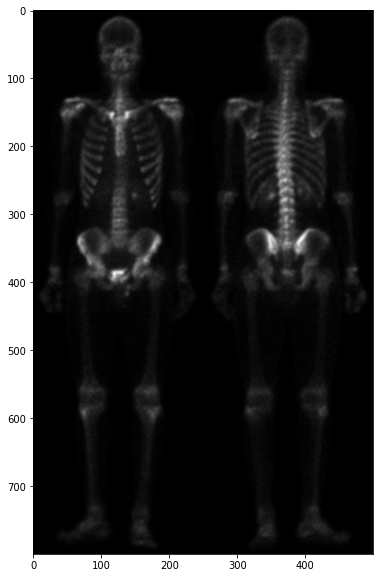

In [1210]:
#sharpness= skelet+mask
sharpness= cv2.add(skelet, mask,dtype= cv2.CV_64F)
sharpness = ConvertTo(sharpness,255)

min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(sharpness)
plt.figure(figsize=(10,10))
plt.imshow(sharpness,cmap = 'gray')

In [1211]:
min_v, max_v

(0.0, 255.0)

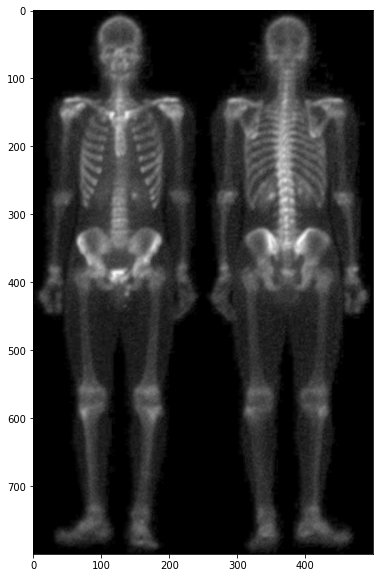

In [1212]:
gammaCorection=cv2.pow(sharpness, 0.5)

gammaCorection = ConvertTo(gammaCorection,255)
min_v, max_v, min_pt, max_pt = cv2.minMaxLoc(gammaCorection)
plt.figure(figsize=(10,10))
plt.imshow(gammaCorection ,cmap = 'gray') 

In [1213]:
min_v, max_v

(0.0, 255.0)